# LIBXTC 
libxtc库 包含一个简单的类`XTCReader`,该类可以访问所有的MD轨迹数据。  
其构造函数采用可选参数：
- 时间范围 beg end
- 步长 dt
- 线程数 nt

如果参数未指定，将使用输入轨迹的默认参数
```python
import libxtc
read=libxtc.XTCReader(fname,beg=1000,dt=100,nt=4)
for x,b.t in read
    print(b,t)
```
***Note:***
- 不进行单位转换
- 帧间隔假定轨迹数据包含所需帧，否则beg、end、dt将不能使用

使用numpy数组传递数据！！！

In [2]:
# Examples
import libxtc
import pandas as pd
import numpy as np
filename="md_200.xtc"
rd=libxtc.XTCReader(filename, beg=-1,dt=200, nt=4)
m=np.array([[0 for i in range(1,4)] for j in range(1,rd.nacur+1)])
while 1:
 for  i,(coord,box,t) in enumerate(rd):
        m=np.append(m,coord,axis=1)
         
 rd.next_frame()
 if rd.eot():
     break


In [6]:
import libxtc
import pandas as pd
import numpy as np
class Traj:
    "Reads trajectory from .xtc file"
                
    def __init__(self,fn,b=-1,e=-1,dt=2,nc=4):
        '''
        # Paramters \n  
        fn: traj filename
        b: start time ps (default -1)
        e: end time ps(default -1)
        dt: skip time ps (default 2 only even numbers)
        nc: cores of cpu to use (default 4)
        '''
        # dt即时间间隔只能为偶数
        self.fn=fn
        self.beg=b
        self.end=e
        self.dt=dt
        self.nc=nc
        self.traj=self.readTraj()
        self.box=self.getBox()
        self.coord=self.getCoord()

        
    def readTraj(self):
        if self.beg==-1:
            pass
        else:
            self.beg=self.beg-self.dt
        return libxtc.XTCReader(self.fn,beg=self.beg,end=self.end,dt=self.dt,nt=self.nc)
        
    def getBox(self):
        return [self.traj.box[i][i]  for i in range(3)]
    
    def getAtomNum(self):
        return self.traj.nacur
    
    def getCoord(self):
        # 0对应于vmd中的第一帧
        atomCoord={}
        x=np.array([[0 for i in range(1,4)] for j in range(1,self.getAtomNum()+1)])
        while 1:
            self.traj.next_frame()
            for m,(coords,box,t) in enumerate(self.traj):
                x=np.array(coords)
                atomCoord[str(self.traj.t)]=x
            if self.traj.eot():
                break
        n_series=pd.Series(atomCoord)
        tmp=pd.concat([(pd.DataFrame(n_series[i],columns=[[str(n_series.keys()[i]),str(n_series.keys()[i]),str(n_series.keys()[i])],["x","y","z"]])) for i in range(n_series.size)],axis=1)
        print("input file contains {} frames  from {} ps to {} ps dt {}ps".format(int(tmp.shape[1]/3),n_series.keys()[0],n_series.keys()[-1],float(n_series.keys()[1])-float(n_series.keys()[0])))
        return tmp

        

In [8]:
import numpy as np
import math

    
class trajcalc_xtc:
    "单xtc轨迹计算"
    
    def __init__(self,sheet):
        self.df=sheet
        self.beg=int(float(sheet.columns[0][0]))
        self.end=int(float(sheet.columns[-1][0]))
        self.dt=int(float(sheet.columns[3][0])-float(sheet.columns[0][0]))
    
    def calDistance(self,atomidx1,atomidx2,b=-1,e=-1,dt=-1):
        """
        # Paramters \n
        atomidx1: atom1 index
        atomidx2: atom2 index
        b: start frame
        e: end frame
        dt: skip frame
        """
        if dt==-1:
            dt=1
        if b==-1:
            b=0
        if e==-1:
            e=int((len(self.df.columns))/3)

        dist=pd.DataFrame([calculate.distance_xtc(self.df,atomidx1,atomidx2,i) for i in range(b,e,dt)],index=[str(float(i)*self.dt+self.beg) for i in range(b,e,dt)])
        return dist
    
    def calangle(self,atomidx1,atomidx2,atomidx3,b=-1,e=-1,dt=-1):
        """
        # Paramters \n
        dt is different from readtraj. dt in there --> frame skip
        atomidx1: atom1 index
        atomidx2: atom2 index
        atomidx2: atom3 index
        b: start frame
        e: end frame
        dt: skip frame
        """
        if dt==-1:
            dt=1
        if b==-1:
            b=0
        if e==-1:
            e=int((len(self.df.columns))/3)
        angle=pd.DataFrame([calculate.angle_xtc(self.df,atomidx1,atomidx2,atomidx3,i) for i in range(b,e,dt)],index=[str(float(i)*self.dt+self.beg) for i in range(b,e,dt) ])
        return angle
    
    def calrmsd(self,b=-1,e=-1,dt=-1,ref=-1):
        """
        # Paramters \n
        # 以时间为标准
        b: start time (default start time)
        e: end time (default end time)
        dt: skip time (default start time)
        ref: reference frame time! (default start time)
        """
        if dt==-1:
            dt=self.dt
        if b==-1:
            b=int(self.beg)
        if e==-1:
            e=int((self.end))
        if ref==-1:
            ref=self.beg
   
        rmsd=pd.DataFrame([calculate.rmsd_xtc(self.df,frame=str(float(i)),rf=str(float(ref))) for i in range(b,e+1,dt)],index=[str(float(i)) for i in range(b,e+1,dt)] )
        return rmsd
    
    def calrmsf(self,idx=-1,b=-1,e=-1,dt=-1,ref=-1):
        """
        ****************************
        该程序暂时废弃 \n
        运行速度太慢了！！！！！！
        ****************************
        # Paramters \n
        # 以时间为标准
        b: start time (default start time)
        e: end time (default end time)
        dt: skip time (default start time)
        ref: reference frame time! (default start time)
        """
        if dt==-1:
            dt=self.dt
        if b==-1:
            b=self.beg
        if e==-1:
            e=self.end
        if ref==-1:
            ref=self.beg
        if idx==-1:
            idx=len(self.df)
        rmsf=[calculate.rmsf_xtc(self.df,atomidx=idx,beg=b,end=e,dt=dt,rf=ref) for idx in range(0,len(self.df) )]
        return rmsf


class trajcalc_com:
    "轨迹+拓扑轨迹计算"
    
    def __init__(self,sheet):
        self.df=sheet
        self.beg=int(float(sheet.columns[4][0]))
        self.end=int(float(sheet.columns[-1][0]))
        self.dt=int(float(sheet.columns[7][0])-float(sheet.columns[4][0]))
    
    def calDistance(self,atomidx1,atomidx2,b=-1,e=-1,dt=-1):
        """
        # Paramters \n
        atomidx1: atom1 index
        atomidx2: atom2 index
        b: start frame
        e: end frame
        dt: skip frame
        """
        if dt==-1:
            dt=1
        if b==-1:
            b=0
        if e==-1:
            e=int((len(self.df.columns)-2)/3)

        dist=pd.DataFrame([calculate.distance_com(self.df,atomidx1,atomidx2,i) for i in range(b,e,dt)],index=[str(float(i)*self.dt+self.beg) for i in range(b,e,dt)])
        return dist
    
    def calangle(self,atomidx1,atomidx2,atomidx3,b=-1,e=-1,dt=-1):
        """
        # Paramters \n
        dt is different from readtraj. dt in there --> frame skip
        atomidx1: atom1 index
        atomidx2: atom2 index
        atomidx2: atom3 index
        b: start frame
        e: end frame
        dt: skip frame
        """
        if dt==-1:
            dt=1
        if b==-1:
            b=0
        if e==-1:
            e=int((len(self.df.columns)-2)/3)
        angle=pd.DataFrame([calculate.angle_com(self.df,atomidx1,atomidx2,atomidx3,i) for i in range(b,e,dt)],index=[str(float(i)*self.dt+self.beg) for i in range(b,e,dt)])
        return angle
    

    def calrmsd(self,b=-1,e=-1,dt=-1,ref=-1):
        """
        # Paramters \n
        # 以时间为标准
        b: start time (default start time)
        e: end time (default end time)
        dt: skip time (default start time)
        ref: reference frame time! (default start time)
        """
        if dt==-1:
            dt=self.dt
        if b==-1:
            b=int(self.beg)
        if e==-1:
            e=int((self.end))
        if ref==-1:
            ref=self.beg
   
        rmsd=pd.DataFrame([calculate.rmsd_xtc(self.df,frame=str(float(i)),rf=str(float(ref))) for i in range(b,e+1,dt)],index=[str(float(i)) for i in range(b,e+1,dt)] )
        return rmsd
    
    def calrmsf(self,idx=-1,b=-1,e=-1,dt=-1,ref=-1):
        """
        ****************************
        该程序暂时废弃 \n
        运行速度太慢了！！！！！！
        ****************************
        # Paramters \n
        # 以时间为标准
        b: start time (default start time)
        e: end time (default end time)
        dt: skip time (default start time)
        ref: reference frame time! (default start time)
        """
        if dt==-1:
            dt=self.dt
        if b==-1:
            b=self.beg
        if e==-1:
            e=self.end
        if ref==-1:
            ref=self.beg
        if idx==-1:
            idx=len(self.df)
        rmsf=[calculate.rmsf_com(self.df,atomidx=idx,beg=b,end=e,dt=dt,rf=ref) for idx in range(0,len(self.df) )]
        return rmsf

In [9]:
class calculate:
        
    def angle_com(sheet,idx1,idx2,idx3,frame):
        idx1_x=float(sheet.iloc[idx1][3*frame+4])
        idx1_y=float(sheet.iloc[idx1][3*frame+5])
        idx1_z=float(sheet.iloc[idx1][3*frame+6])
        idx2_x=float(sheet.iloc[idx2][3*frame+4])
        idx2_y=float(sheet.iloc[idx2][3*frame+5])
        idx2_z=float(sheet.iloc[idx2][3*frame+6])
        idx3_x=float(sheet.iloc[idx3][3*frame+4])
        idx3_y=float(sheet.iloc[idx3][3*frame+5])
        idx3_z=float(sheet.iloc[idx3][3*frame+6])
        a_arr=np.array([idx1_x-idx2_x,idx1_y-idx2_y,idx1_z-idx2_z])
        b_arr=np.array([idx3_x-idx2_x,idx3_y-idx2_y,idx3_z-idx2_z])
        l_x=np.sqrt(a_arr.dot(a_arr))
        l_y=np.sqrt(b_arr.dot(b_arr))
        dot=a_arr.dot(b_arr)
        cosA=dot/(l_x*l_y)
        angle=np.arccos(cosA)*180/np.pi
        return angle
    
    def angle_xtc(sheet,idx1,idx2,idx3,frame):
        idx1_x=float(sheet.iloc[idx1][3*frame])
        idx1_y=float(sheet.iloc[idx1][3*frame+1])
        idx1_z=float(sheet.iloc[idx1][3*frame+2])
        idx2_x=float(sheet.iloc[idx2][3*frame])
        idx2_y=float(sheet.iloc[idx2][3*frame+1])
        idx2_z=float(sheet.iloc[idx2][3*frame+2])
        idx3_x=float(sheet.iloc[idx3][3*frame])
        idx3_y=float(sheet.iloc[idx3][3*frame+1])
        idx3_z=float(sheet.iloc[idx3][3*frame+2])
        a_arr=np.array([idx1_x-idx2_x,idx1_y-idx2_y,idx1_z-idx2_z])
        b_arr=np.array([idx3_x-idx2_x,idx3_y-idx2_y,idx3_z-idx2_z])
        l_x=np.sqrt(a_arr.dot(a_arr))
        l_y=np.sqrt(b_arr.dot(b_arr))
        dot=a_arr.dot(b_arr)
        cosA=dot/(l_x*l_y)
        angle=np.arccos(cosA)*180/np.pi
        return angle
    
    def rmsd_xtc(sheet,frame,rf):
        return math.sqrt(((sheet[str(float(frame))]["x"]-sheet[rf]["x"])**2+(sheet[str(float(frame))]["y"]-sheet[rf]["y"])**2+(sheet[str(float(frame))]["z"]-sheet[rf]["z"])**2).sum()/len(sheet))
    
    def rmsf_xtc(sheet,atomidx,beg,end,dt,rf):
        rf_xyz=np.array([sheet.loc[atomidx][str(float(rf))] for i in range(beg,end,dt)])
        xyz=np.array([sheet.loc[atomidx][str(float(i))] for i in range(beg,end,dt)])
        rmsf=np.sqrt(np.square(xyz-rf_xyz).sum()/(end-beg))
        return rmsf  
    
    def rmsf_com(sheet,atomidx,beg,end,dt,rf):
        rf_xyz=np.array([sheet.loc[atomidx][str(float(rf))] for i in range(beg,end,dt)])
        xyz=np.array([sheet.loc[atomidx][str(float(i))] for i in range(beg,end,dt)])
        rmsf=np.sqrt(np.square(xyz-rf_xyz).sum()/(end-beg))
        return rmsf 
     
    def distance_xtc(sheet,idx1,idx2,frame):
        return math.sqrt((sheet.iloc[idx1][3*frame]-sheet.iloc[idx2][3*frame])**2+(sheet.iloc[idx1][3*frame+1]-sheet.iloc[idx2][3*frame+1])**2+(sheet.iloc[idx1][3*frame+2]-sheet.iloc[idx2][3*frame+2])**2)/3 

    def distance_com(sheet,idx1,idx2,frame): 
        return math.sqrt((sheet.iloc[idx1][3*frame+4]-sheet.iloc[idx2][3*frame+4])**2+(sheet.iloc[idx1][3*frame+5]-sheet.iloc[idx2][3*frame+5])**2+(sheet.iloc[idx1][3*frame+6]-sheet.iloc[idx2][3*frame+6])**2)/3 
    
        

In [10]:
import pandas as pd
class gro:
    "读取gro文件"
    
    def __init__(self,fn):
        self.fn=fn 
        self.atomInfo=self.readGro()
        
    def readGro(self):
        gro=open(self.fn,"r")
        atomSet=[]
        for line in gro.readlines():
            tmp=[]
            if len(line.split())>3:
                # 1 resnum 2 resn 3 aton name 4 atom num 5x 6y 7z 8vx 9vy 10vz
                tmp.append(line[0:5].replace(" ",""))
                tmp.append(line[5:10].replace(" ",""))
                tmp.append(line[10:15].replace(" ",""))
                tmp.append(line[15:20].replace(" ",""))
                tmp.append(line[20:28].replace(" ",""))
                tmp.append(line[28:36].replace(" ",""))
                tmp.append(line[36:44].replace(" ",""))
                tmp.append(line[44:52].replace(" ",""))
                tmp.append(line[52:60].replace(" ",""))
                tmp.append(line[60:68].replace(" ",""))
            if tmp!=[]:
                atomSet.append(tmp)
        return pd.DataFrame(atomSet,columns=["resNum","resName","atomName","atomNum","X","Y","Z","Vx","Vy","Vz"])

In [11]:
class combine():
    """
    读取gro文件和xtc文件并整合
    """
    def __init__(self,grofile,xtcfile,b=-1,e=-1,dt=2,nc=4):
        '''
        # Paramters \n  
        fn: traj filename
        b: start frame (default -1)
        e: end frame (default -1)
        dt: skip frames (default 2 only even numbers)
        nc: cores of cpu to use (default 4)
        '''
        self.beg=b
        self.end=e
        self.dt=dt
        self.nc=nc
        self.grofile=grofile
        self.xtcfile=xtcfile
        
    def gro_xtc(self):
        groFile=gro(self.grofile).readGro()
        xtcFile=Traj(self.xtcfile,b=self.beg,e=self.end,dt=self.dt,nc=self.nc).coord
        xtcFile.insert(0,"atomNum",groFile["atomNum"])
        xtcFile.insert(1,"atomName",groFile["atomName"])
        xtcFile.insert(2,"resNum",groFile["resNum"])
        xtcFile.insert(3,"resName",groFile["resName"])
        return xtcFile   

In [14]:
x=Traj("md_200.xtc").coord
x

input file contains 200 frames  from 200.0 ps to 40000.0 ps dt 200.0ps


200.0                400.0                      600.0                \
           x      y      z      x         y         z      x      y      z   
0      4.376  5.549  3.212  4.434  5.515000  3.245000  4.471  5.526  3.307   
1      4.400  5.626  3.273  4.512  5.548000  3.300000  4.407  5.588  3.259   
2      4.455  5.514  3.160  4.465  5.459000  3.167000  4.530  5.571  3.375   
3      4.315  5.587  3.142  4.391  5.598000  3.206000  4.539  5.483  3.246   
4     -3.976 -5.343 -3.224 -4.045 -5.352000 -3.261000 -4.045 -5.294 -3.312   
...      ...    ...    ...    ...       ...       ...    ...    ...    ...   
31733  0.233  2.908  2.761  5.874  1.896000  3.014000  5.493  1.235  3.695   
31734  3.007  4.994  1.227  1.908  5.014000  1.115000  1.544  4.000  1.584   
31735  2.889  0.707  1.869  1.615  0.224000  0.417000  1.634  6.402  1.534   
31736  1.209  5.414  1.303  6.790  5.632000  0.630000  0.704  5.262  5.300   
31737  4.621  5.441  0.402  3.727  6.039001  6.756001  5.271  6.387  0.227   

       800.0  ... 39400.0 39600.0               39800.0               40000.0  \
           x  ...       z       x      y      z       x      y      z       x   
0      4.390  ...   2.805   3.875  5.309  2.963   4.013  5.254  2.946   3.731   
1      4.303  ...   2.717   3.937  5.384  2.990   4.029  5.241  2.847   3.757   
2      4.435  ...   2.876   3.892  5.291  2.865   3.917  5.285  2.950   3.767   
3      4.445  ...   2.816   3.783  5.341  2.990   4.072  5.325  2.987   3.631   
4     -4.020  ...   2.848   3.908  5.185  3.032   4.030  5.129  3.021   3.795   
...      ...  ...     ...     ...    ...    ...     ...    ...    ...     ...   
31733  0.041  ...   3.624   2.599  4.564  3.702   2.763  4.548  3.685   2.685   
31734  1.653  ...   3.484   1.814  2.398  3.622   1.750  2.448  3.561   1.779   
31735  2.172  ...   3.577   3.662  4.406  3.649   3.700  4.447  3.686   3.645   
31736  5.597  ...   1.804   3.021  5.101  2.039   2.891  5.420  0.380   4.344   
31737  4.809  ...   1.845   2.579  3.067  1.871   2.539  3.067  1.911   2.522   

                     
           y      z  
0      5.217  2.876  
1      5.310  2.905  
2      5.196  2.783  
3      5.209  2.872  
4      5.116  2.961  
...      ...    ...  
31733  4.540  3.775  
31734  2.427  3.583  
31735  4.373  3.716  
31736  6.714  2.758  
31737  3.076  1.917  

[31738 rows x 600 columns]

In [16]:
m=combine("md.gro","md_200.xtc").gro_xtc()
m

input file contains 200 frames  from 200.0 ps to 40000.0 ps dt 200.0ps


c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  exec(code_obj, self.user_global_ns, self.user_ns)


atomNum atomName resNum resName  200.0                400.0            \
                                           x      y      z      x         y   
0           1        N      2     ASN  4.376  5.549  3.212  4.434  5.515000   
1           2       H1      2     ASN  4.400  5.626  3.273  4.512  5.548000   
2           3       H2      2     ASN  4.455  5.514  3.160  4.465  5.459000   
3           4       H3      2     ASN  4.315  5.587  3.142  4.391  5.598000   
4           5       CA      2     ASN -3.976 -5.343 -3.224 -4.045 -5.352000   
...       ...      ...    ...     ...    ...    ...    ...    ...       ...   
31733   31734       NA   9526      NA  0.233  2.908  2.761  5.874  1.896000   
31734   31735       NA   9527      NA  3.007  4.994  1.227  1.908  5.014000   
31735   31736       NA   9528      NA  2.889  0.707  1.869  1.615  0.224000   
31736   31737       NA   9529      NA  1.209  5.414  1.303  6.790  5.632000   
31737   31738       NA   9530      NA  4.621  5.441  0.402  3.727  6.039001   

                 ... 39400.0 39600.0               39800.0                \
              z  ...       z       x      y      z       x      y      z   
0      3.245000  ...   2.805   3.875  5.309  2.963   4.013  5.254  2.946   
1      3.300000  ...   2.717   3.937  5.384  2.990   4.029  5.241  2.847   
2      3.167000  ...   2.876   3.892  5.291  2.865   3.917  5.285  2.950   
3      3.206000  ...   2.816   3.783  5.341  2.990   4.072  5.325  2.987   
4     -3.261000  ...   2.848   3.908  5.185  3.032   4.030  5.129  3.021   
...         ...  ...     ...     ...    ...    ...     ...    ...    ...   
31733  3.014000  ...   3.624   2.599  4.564  3.702   2.763  4.548  3.685   
31734  1.115000  ...   3.484   1.814  2.398  3.622   1.750  2.448  3.561   
31735  0.417000  ...   3.577   3.662  4.406  3.649   3.700  4.447  3.686   
31736  0.630000  ...   1.804   3.021  5.101  2.039   2.891  5.420  0.380   
31737  6.756001  ...   1.845   2.579  3.067  1.871   2.539  3.067  1.911   

      40000.0                
            x      y      z  
0       3.731  5.217  2.876  
1       3.757  5.310  2.905  
2       3.767  5.196  2.783  
3       3.631  5.209  2.872  
4       3.795  5.116  2.961  
...       ...    ...    ...  
31733   2.685  4.540  3.775  
31734   1.779  2.427  3.583  
31735   3.645  4.373  3.716  
31736   4.344  6.714  2.758  
31737   2.522  3.076  1.917  

[31738 rows x 604 columns]

input file contains 200 frames  from 200.0 ps to 40000.0 ps dt 200.0ps


<AxesSubplot:>

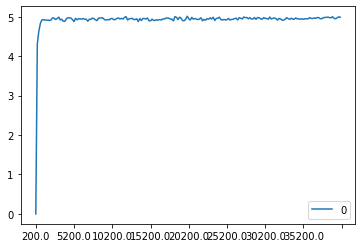

In [25]:
trajcalc_xtc(Traj("md_200.xtc").coord).calrmsd().plot()

In [17]:
def resi_sele(sheet,sele):
    """
    #Paramters
    sele example: `resi 1:5`
                  `resi 1:5,10`
                  `resi 1,2,3`
    """
    sele_name=list(filter(None,sele.split(" ")))
    if sele_name[0].lower()=="resi":
        tmp=[]
        for i in sele_name[1].split(","):
            if len(i.split(":"))==2:
                tmp.append(list(map(str,range(int(i.split(":")[0]),int(i.split(":")[1])+1))))
            else:
                tmp.append([i])
            return sheet[sheet["resNum"].isin(sum(tmp,[]))]
    else:
        print("please enter the correct format(resi 1:5 or resi 1,2) ")
        

def resn_sele(sheet,sele):
    """
    #Paramters
    only return existed resname
    sele example: `resn xxx,xxx`
    """
    sele_name=list(filter(None,sele.split(" ")))
    if sele_name[0].lower()=="resn":
        tmp=[]
        for i in sele_name[1].split(","):
            tmp.append([i]) 
        return sheet[sheet["resName"].isin(sum(tmp,[]))] 
    else:
        print("please enter the correct format(resn xxx) ") 
    

def atom_sele(sheet,sele):
    """
    #Paramters
    only return existed atomname
    sele example: `name xxx,xxx`
    if use `name C*` return all C atom
    """
    sele_name=list(filter(None,sele.split(" ")))
    tmp=[]
    if sele_name[0].lower()=="name":
        for i in sele_name[1].split(","):
            if i.endswith("*"):
                tmp.append(sheet[sheet["atomName"].str.contains(i[0])]["atomName"].unique().tolist())   
            else:
                tmp.append([i])
        return sheet[sheet["atomName"].isin(sum(tmp,[]))]  
    else:
        print("please enter the correct format(name C1,C2 or name C*) ")



In [211]:
# 放弃
def calcHbonds(sheet,sele,dt=2):
    dfTmp=pd.DataFrame(np.repeat(np.array([sheet.loc[sele]]),len(sheet),axis=0))
    dfTmp.columns=sheet.columns
    dist=sheet
    dist.iloc[:,4:]=(sheet.iloc[:,4:]-dfTmp.iloc[:,4:])**2
    tmp={}
    column=[]
    for i in range(int((dist.shape[1]-4)/3)):
        tmp[i]=np.sqrt(np.array(((dist.iloc[:,(4+i*3)]+dist.iloc[:,(4+i*3+1)]+dist.iloc[:,(4+i*3+2)])/3).astype("float")))
        column.append(str(dt+i*dt))
    dfDist=pd.DataFrame(tmp)
    dfDist.columns=column
    return dfDist


In [13]:
resn_sele(m,sele="resn URA")

atomNum atomName resNum resName    2.0                  4.0         \
                                          x      y      z      x      y   
0          1       C1      1     URA  1.942  0.094  1.803  1.928  0.092   
1          2       O2      1     URA  2.007  2.892  1.811  2.027  0.032   
2          3       N3      1     URA  1.809  0.100  1.762 -1.507 -0.059   
3          4       H4      1     URA  1.749  0.181  1.767  1.742  0.158   
4          5       H5      1     URA  1.763  0.011  1.754  1.819  0.036   
...      ...      ...    ...     ...    ...    ...    ...    ...    ...   
1195    1196       H4    150     URA -1.851  0.273 -1.526 -2.222  0.016   
1196    1197       H5    150     URA  2.406  0.165  2.194  2.671  0.295   
1197    1198       N6    150     URA -2.062  0.598 -1.751 -1.860 -0.201   
1198    1199       H7    150     URA  2.526 -0.002  2.291  2.215  0.433   
1199    1200       H8    150     URA -1.970  0.389 -1.900  2.145  0.484   

             ...  194.0  196.0                198.0                200.0  \
          z  ...      z      x      y      z      x      y      z      x   
0     1.747  ...  1.693  2.126  2.770  1.666  2.165  2.881  1.620  2.142   
1     1.720  ...  1.776  2.159  2.680  1.740  2.235  2.798  1.670  2.196   
2    -1.578  ...  1.715  2.023  2.855  1.693  2.038  2.902  1.664 -1.784   
3     1.706  ...  1.633  2.014  0.040  1.631  1.973  0.059  1.627  1.981   
4     1.593  ...  1.804  1.968  2.839  1.776  2.009  2.851  1.746  1.958   
...     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
1195 -1.659  ... -1.820 -2.032 -0.032 -1.883 -2.033 -0.153 -1.784 -2.022   
1196  2.102  ...  2.256  2.414  0.453  2.340  2.393  0.582  2.244  2.311   
1197 -1.442  ... -1.667 -2.119  0.314 -1.599 -1.981  0.284 -1.558 -1.988   
1198  1.730  ...  1.928  2.361  0.067  1.899  2.284  0.126  1.833  2.213   
1199  1.678  ...  1.896  2.407 -0.001  1.826  2.261  0.031  1.788  2.200   

                    
          y      z  
0     2.867  1.600  
1     2.783  1.667  
2     0.009 -1.335  
3     0.085  1.562  
4     2.879  1.705  
...     ...    ...  
1195 -0.139 -1.936  
1196  0.514  2.307  
1197  0.297 -1.742  
1198  0.043  1.952  
1199 -0.038  1.906  

[1200 rows x 304 columns]

In [15]:
resi_sele(m,sele="resi 4:8")

atomNum atomName resNum resName    2.0                  4.0                \
                                        x      y      z      x      y      z   
24      25       C1      4     URA -1.286 -1.567  0.201 -1.227 -1.454  0.273   
25      26       O2      4     URA  1.676  2.048  0.301  1.720  2.047  0.329   
26      27       N3      4     URA  1.787  2.057  0.249  1.834  2.009  0.322   
27      28       H4      4     URA -1.397 -1.611  0.248 -1.350 -1.437  0.267   
28      29       H5      4     URA  1.902  1.992  0.010  1.987  1.861  0.158   
29      30       N6      4     URA -0.984 -1.616 -0.017 -1.012 -1.675  0.032   
30      31       H7      4     URA  1.476  2.068  0.452  1.500  2.126  0.414   
31      32       H8      4     URA  1.401  2.064  0.515  1.419  2.141  0.456   
32      33       C1      5     URA  0.406 -0.822 -1.171  0.329 -0.717 -1.109   
33      34       O2      5     URA  0.163  1.394  1.768  0.225  1.298  1.708   
34      35       N3      5     URA  0.066  1.341  1.813  0.129  1.238  1.746   
35      36       H4      5     URA  0.500 -0.777 -1.232  0.422 -0.658 -1.170   
36      37       H5      5     URA -0.133  1.203  1.702 -0.038  1.059  1.639   
37      38       N6      5     URA  0.884 -0.587 -1.360 -0.066 -1.029 -1.190   
38      39       H7      5     URA -0.317  1.099  1.787  0.428  1.433  1.687   
39      40       H8      5     URA  0.806 -0.530 -1.112  0.506  1.501  1.665   
40      41       C1      6     URA -0.145 -1.714 -2.311 -0.253 -1.690  0.488   
41      42       O2      6     URA  0.769  2.274  2.823  0.868  2.270  0.029   
42      43       N3      6     URA  0.680  2.359  2.850  0.767  2.332  0.056   
43      44       H4      6     URA -0.075 -1.809 -2.349 -0.163 -1.779  0.468   
44      45       H5      6     URA  0.417  2.347  2.888  0.491  2.289  0.047   
45      46       N6      6     URA -0.573 -1.655 -2.325  0.230 -1.997  0.390   
46      47       H7      6     URA  0.985  2.157  2.763  1.091  2.197  2.859   
47      48       H8      6     URA  1.067  2.112  2.729  1.169  2.350  0.008   
48      49       C1      7     URA -0.334 -0.544 -1.466 -0.281 -0.505 -1.410   
49      50       O2      7     URA  0.926  0.963  1.964  0.872  0.928  1.916   
50      51       N3      7     URA  0.862  0.967  2.079  0.811  0.929  2.019   
51      52       H4      7     URA -0.278 -0.526 -1.576 -0.246 -0.503 -1.510   
52      53       H5      7     URA  0.650  1.097  2.170  0.626  1.108  2.088   
53      54       N6      7     URA -0.696 -0.582 -1.298 -0.648 -0.559 -1.258   
54      55       H7      7     URA  1.090  0.913  1.771  1.050  0.895  1.736   
55      56       H8      7     URA  1.169  0.913  1.717  1.126  0.893  1.669   
56      57       C1      8     URA -0.774 -0.667 -2.254 -0.808 -0.746 -2.296   
57      58       O2      8     URA  1.303  1.207  2.652  1.313  1.278  2.694   
58      59       N3      8     URA  1.353  1.287  2.734  1.380  1.360  2.739   
59      60       H4      8     URA -0.843 -0.750 -2.320 -0.878 -0.836 -2.327   
60      61       H5      8     URA  1.412  1.290  2.997  1.464  1.387  2.999   
61      62       N6      8     URA -1.067 -1.001 -2.632 -1.132 -1.127 -2.548   
62      63       H7      8     URA  1.535  1.422  3.156  1.652  1.547  3.102   
63      64       H8      8     URA -0.958 -0.795 -2.752 -1.136 -0.939 -2.732   

    ...  194.0  196.0                198.0                200.0                
    ...      z      x      y      z      x      y      z      x      y      z  
24  ... -0.113 -0.794 -2.104 -0.183 -0.778 -2.098 -0.446 -0.914 -2.250 -0.369  
25  ...  0.752  1.328  2.504  0.719  1.303  2.505  0.900  1.314  2.531  0.780  
26  ...  0.776  1.425  2.556  0.681  1.407  2.569  0.909  1.432  2.587  0.792  
27  ... -0.142 -0.907 -2.141 -0.142 -0.895 -2.148 -0.440 -1.035 -2.280 -0.409  
28  ...  0.834  1.488  2.811  0.596  1.491  2.805  1.014  1.534  2.841  0.845  
29  ... -0.266 -0.662 -1.941 -0.317 -0.623 -1.983 -0.461 -0.613 -2.017 -0.401  
30

In [141]:
sele=" resn URA,MOL"
sele_name=list(filter(None,sele.split(" ")))
tmp=[]
for i in sele_name[1].split(","):
    print(i)
    tmp.append([i])
tmp


URA
MOL


[['URA'], ['MOL']]